In [1]:
import numpy as np
from collections import defaultdict
from scripts.data import PagedData
import os
pagedData=PagedData(os.path.join(os.getcwd(),"data/train"))
print(f"Number of sessions: {len(pagedData)}")
print(f"Batch size: {pagedData.BATCHSIZE}")

Exception: Number of session and number of file mismatched.                            
Session count divided by BATCHSIZE: 559.                            
Last File: 558.                            
Number of file: 645.                            
Are some files from the data directory missing?

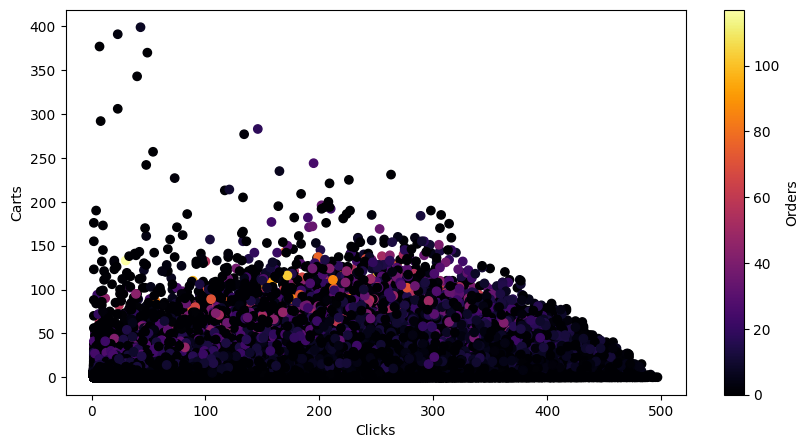

In [ ]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize = (10, 5))
print(PagedData[0])
    